# Growth rate analysis with Bioscreen or any 96-well plate

This notebook contain workflow to prepare and analyse the results of microbial growth rate in Bioscreen Honeycomb plates or any 96-well plate.

### Steps:
1. Install requirements.
2. Import raw data.
3. Prepare raw data for visualisation (numpy, pandas).
4. Visualisation of growth curves.
5. Usage of [pyphe-growthcurves made by Stephan Kamrad from Bahler Lab](https://github.com/Bahler-Lab/pyphe-growthcurves) for determination of maximal slope of growth curves and time of microbial lag phase.
6. Visualisation of max_slope and lap phase on box plots (matplotlib, seaborn).



### Requirements: 
    . numpy >= 1.8.0
    . scipy >= 0.17.0
    . pysam >= 0.8
    . matplotlib >= 1.4.0
    . seaborn
    . pytime
    . parsedatatime
    . pytimeparse

### Install requirenments:

In [ ]:
!pip install -r requirements.txt

In [ ]:
# Install other requierments with pip install
!pip install parsedatetime

In [ ]:
!pip install pytimeparse

In [ ]:
!pip install pytime

### Import libraries and moduls:

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as DT
from datetime import timedelta
import parsedatetime
from pytimeparse import parse

%matplotlib inline

### Import metadata file with layout of the plate(s):

Prepare the layour in a separate file , only with the names of samples in the raws and columns as below:

In [25]:
metadata = pd.read_csv("Metadata_layout.csv", sep = ',')

## Function to look at the head of DataFrame (only first 5 rows):
# metadata.head() 

### Import the file with layout prepared beforehand:

In [26]:
metadata = pd.read_csv("Metadata_example_results_dots.csv", sep = ',')

### This step will make one column with the names of the samples from all columns in the layout:

In [27]:
column_names = pd.concat([metadata[col_name] for col_name in metadata.columns],ignore_index=True)

### Import the raw results and change index (the first row) to the names of the samples: 

In [28]:
## Import raw data as raw_results_d:
raw_results_d = pd.read_csv("raw_results_example.csv", sep=';')

## Make a list from your column names :
lista_nowych_nazw=list(column_names)

## Add "Time" to the list:
lista_nowych_nazw=["time"]+lista_nowych_nazw

## Use belowed code if you want to change the name of some sample (here 3rd sample):
# lista_nowych_nazw[3]="Other name"

## Add prepared list with names with your DataFrame containing raw results as the index.
raw_results_d.columns=lista_nowych_nazw

## Check it if you want:
#raw_results_d.head()

### Preparation of data to obtain DataFrame with desirable format of time:

In [48]:
## Drop column "time" to make new column with time in hours instead of in the format: %H:%M:%S:
raw_results_bezczas = raw_results_d.drop(['time'], axis=1)

## Transpose DataFrame to add column with proper column names from the metadata layout:
cos_nowego = raw_results_bezczas.transpose()

## Make new variable column_times containing column "time" from DataFrame raw_results_d
column_times = raw_results_d['time']

### Use parse function to gain time in secounds from format '%H:%M:%S':
for i in range(len(column_times)):
    column_times[i] = parse(column_times[i], '%H:%M:%S')
    
## Gain time in hours:
for i in range(len(column_times)):
    column_times[i] = column_times[i]/3600.0 
    
## Add column with time in hours to the DataFrame:
indexed['Time'] = column_times

## Set collumn tima as the index:
indexed_plus_time = indexed.set_index('Time')

## Export new DataFrame to .csv file:
indexed_plus_time.to_csv("probna_tabelka.csv", sep='\t')

## Check it:
indexed_plus_time.head()

/home/lidia/anaconda3/envs/dm4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/lidia/anaconda3/envs/dm4/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/lidia/anaconda3/envs/dm4/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_n

,WT.1,WT.2,CID1.1,CID1.2,CID11.1,CID11.2,CID13.1,CID13.2,CID16.1,CID16.2,...,WT.etOH.1,WT.etOH.2,CID1.etOH.1,CID1.etOH.2,CID11.etOH.1,CID11.etOH.2,CID13.etOH.1,CID13.etOH.2,CID16.etOH.1,CID16.etOH.2
Time,,,,,,,,,,,,,,,,,,,,,
0.001389,0.176,0.165,0.055,0.103,0.078,0.147,0.099,0.122,0.120,0.061,...,0.144,0.165,0.146,0.114,0.175,0.138,0.150,0.171,0.191,0.108
0.192778,0.086,0.094,0.150,0.123,0.118,0.080,0.051,0.056,0.061,0.102,...,0.093,0.134,0.143,0.149,0.097,0.142,0.122,0.129,0.143,0.164
0.441667,0.102,0.108,0.180,0.133,0.134,0.093,0.065,0.064,0.069,0.122,...,0.106,0.117,0.136,0.131,0.092,0.128,0.117,0.118,0.139,0.154
0.691389,0.112,0.107,0.186,0.137,0.132,0.093,0.065,0.066,0.071,0.116,...,0.120,0.141,0.148,0.153,0.103,0.147,0.129,0.128,0.157,0.157
0.940556,0.102,0.095,0.145,0.115,0.109,0.082,0.048,0.053,0.058,0.104,...,0.121,0.125,0.144,0.142,0.100,0.139,0.127,0.120,0.148,0.148


## THE PLOTS

In [73]:
## Import DataFrame prepared in the previous step: 
krzywe_Time = pd.read_csv("probna_tabelka.csv", sep = "\t")

## Set "Time" as the index:
#krzywe_Time = krzywe_Time.set_index("Time")

In [74]:
def przeszukaj(nazwa,colum_names):
    """Return the unique names of columns (samples)
    
    PARAMETERS:
    nazwa (str),
    column_names (df)
    """
    number_of_copies=sum([nazwa in column for column in column_names])
    return number_of_copies 


nazwy_orinalow=[orginal for orginal in column_names if przeszukaj(orginal,column_names)>1]
print(nazwy_orinalow)

['WT.1', 'WT.2', 'CID1.1', 'CID1.2', 'CID11.1', 'CID11.2', 'CID13.1', 'CID13.2', 'CID16.1', 'CID16.2', 'Blank', 'Blank.1', 'Blank.2', 'Blank.3', 'Blank.4', 'Blank.5', 'WT.etOH.1', 'WT.etOH.2', 'CID1.etOH.1', 'CID1.etOH.2', 'CID11.etOH.1', 'CID11.etOH.2', 'CID13.etOH.1', 'CID13.etOH.2', 'CID16.etOH.1', 'CID16.etOH.2']


In [78]:
column_names= krzywe_Time.columns
column_names
time = krzywe_Time["Time"]

In [79]:
def wyciagnij_wszystkie_powtorzenia(nazwa_orginalu, column_names=column_names):
    '''
    
    '''
    kolumny=np.concatenate([np.array(krzywe_Time[name]) for name in column_names if nazwa_orginalu in name])
    
    czasy=np.concatenate([np.array(time) for name in column_names if nazwa_orginalu in name])
    
    zebrana_dataframe= pd.DataFrame(data={'Time': czasy, "OD":kolumny})
    return zebrana_dataframe

In [80]:
proba=wyciagnij_wszystkie_powtorzenia(nazwy_orinalow[1])

,Time,OD
0,0.001389,0.165
1,0.192778,0.094
2,0.441667,0.108
3,0.691389,0.107
4,0.940556,0.095


In [81]:
## Make a list "mozliwe szczepy" with the major names of samples - the samples will be grouped by the names.

mozliwe_szczepy=['WT', 'CID','Blank']

def zrob_nowe_wiersze(column_name):
    proba=wyciagnij_wszystkie_powtorzenia(column_name)
    
    przed_p_kropka=column_name.split(".")[0]
    
    
    proba["strain"]=next(szczep for szczep in mozliwe_szczepy if szczep in przed_p_kropka)
    proba["name"]=column_name
    return proba

lista_nowy_df=[zrob_nowe_wiersze(column_name) for column_name in nazwy_orinalow]

splaszczony_df=pd.concat(lista_nowy_df)

WT
CID
Blank


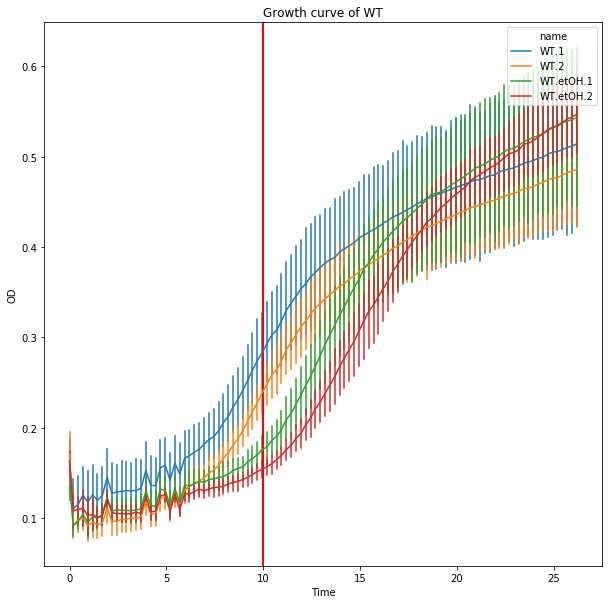

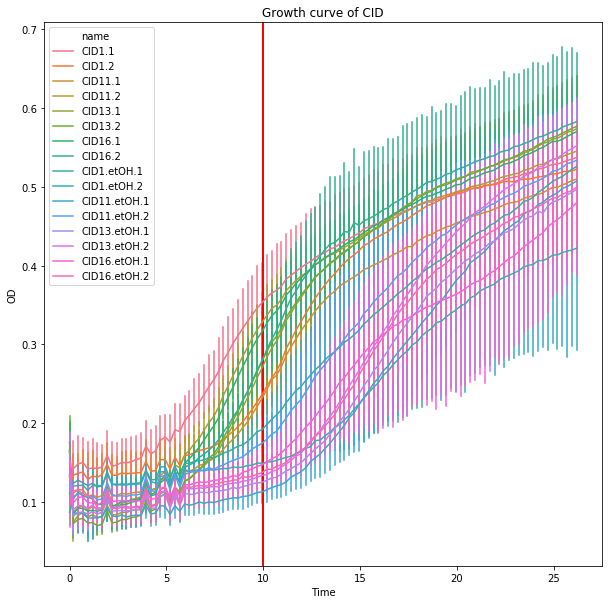

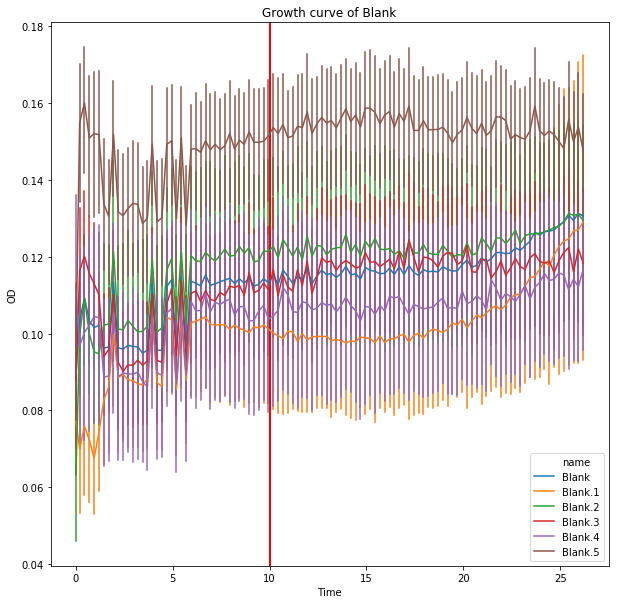

In [82]:
### Draw growth curves for groups of samples (see "mozliwe szczepy" below)

for szczep_name in mozliwe_szczepy:
    print(szczep_name)
    tylko_szczep_32=splaszczony_df[splaszczony_df["strain"]==szczep_name]
    f = plt.figure(figsize=(10,10))
    plt.title("Growth curve of {}".format(szczep_name))
    plt.axvline(x=10, linewidth=2, color='r')
    sns.lineplot(x="Time", y="OD", data=tylko_szczep_32, hue="name",err_style="bars")
    f.savefig("{}_1.png".format(szczep_name))   #Save the figure as .pdf. or .png file

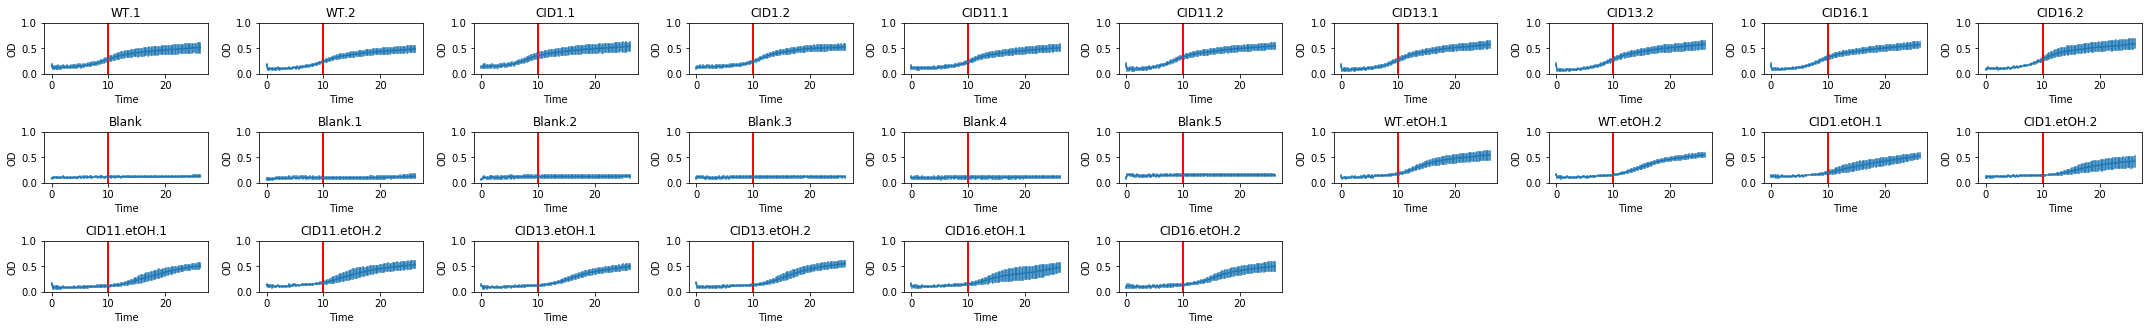

In [83]:
# Make matrix with mean growth curves (growth curves with mean and standard deviation)

f = plt.figure(figsize=(30,30))

len(column_names)
for siatka_n, column_name in enumerate(nazwy_orinalow):
    proba=wyciagnij_wszystkie_powtorzenia(column_name)

    plt.subplot(20,10, siatka_n+1)
    plt.title(column_name)
    plt.ylim([0,1])
    plt.axvline(x=10, linewidth=2, color='r')
    sns.lineplot(data=proba, x="Time", y="OD",err_style="bars")
    #plt.plot(time, krzywe_Time[column_name])
    
plt.tight_layout()
f.savefig("all_figures_mean.pdf")   #Save the figure as .pdf. or .png file

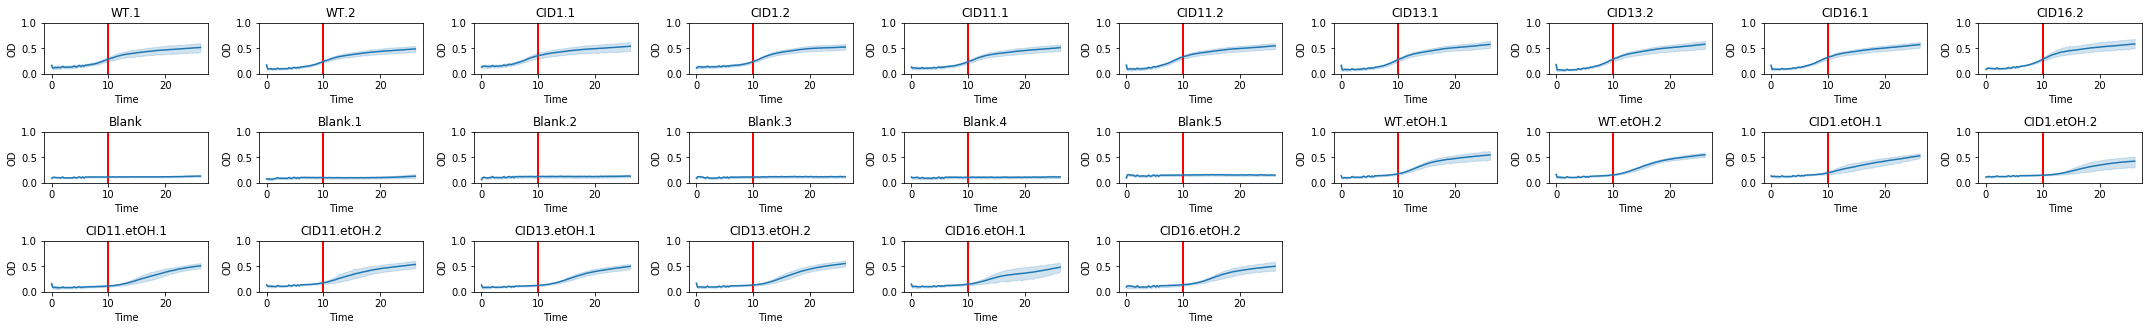

In [84]:
## The same but with error style "band"

f = plt.figure(figsize=(30,30))

len(column_names)
for siatka_n, column_name in enumerate(nazwy_orinalow):
    proba=wyciagnij_wszystkie_powtorzenia(column_name)

    plt.subplot(20, 10, siatka_n+1)
    plt.title(column_name)
    plt.ylim([0,1])
    plt.axvline(x=10, linewidth=2, color='r')
    sns.lineplot(data=proba, x="Time", y="OD",err_style="band")
    #plt.plot(time, krzywe_Time[column_name])
    
plt.tight_layout()
f.savefig("all_figures.pdf")    #Save the figure as .pdf. or .png file

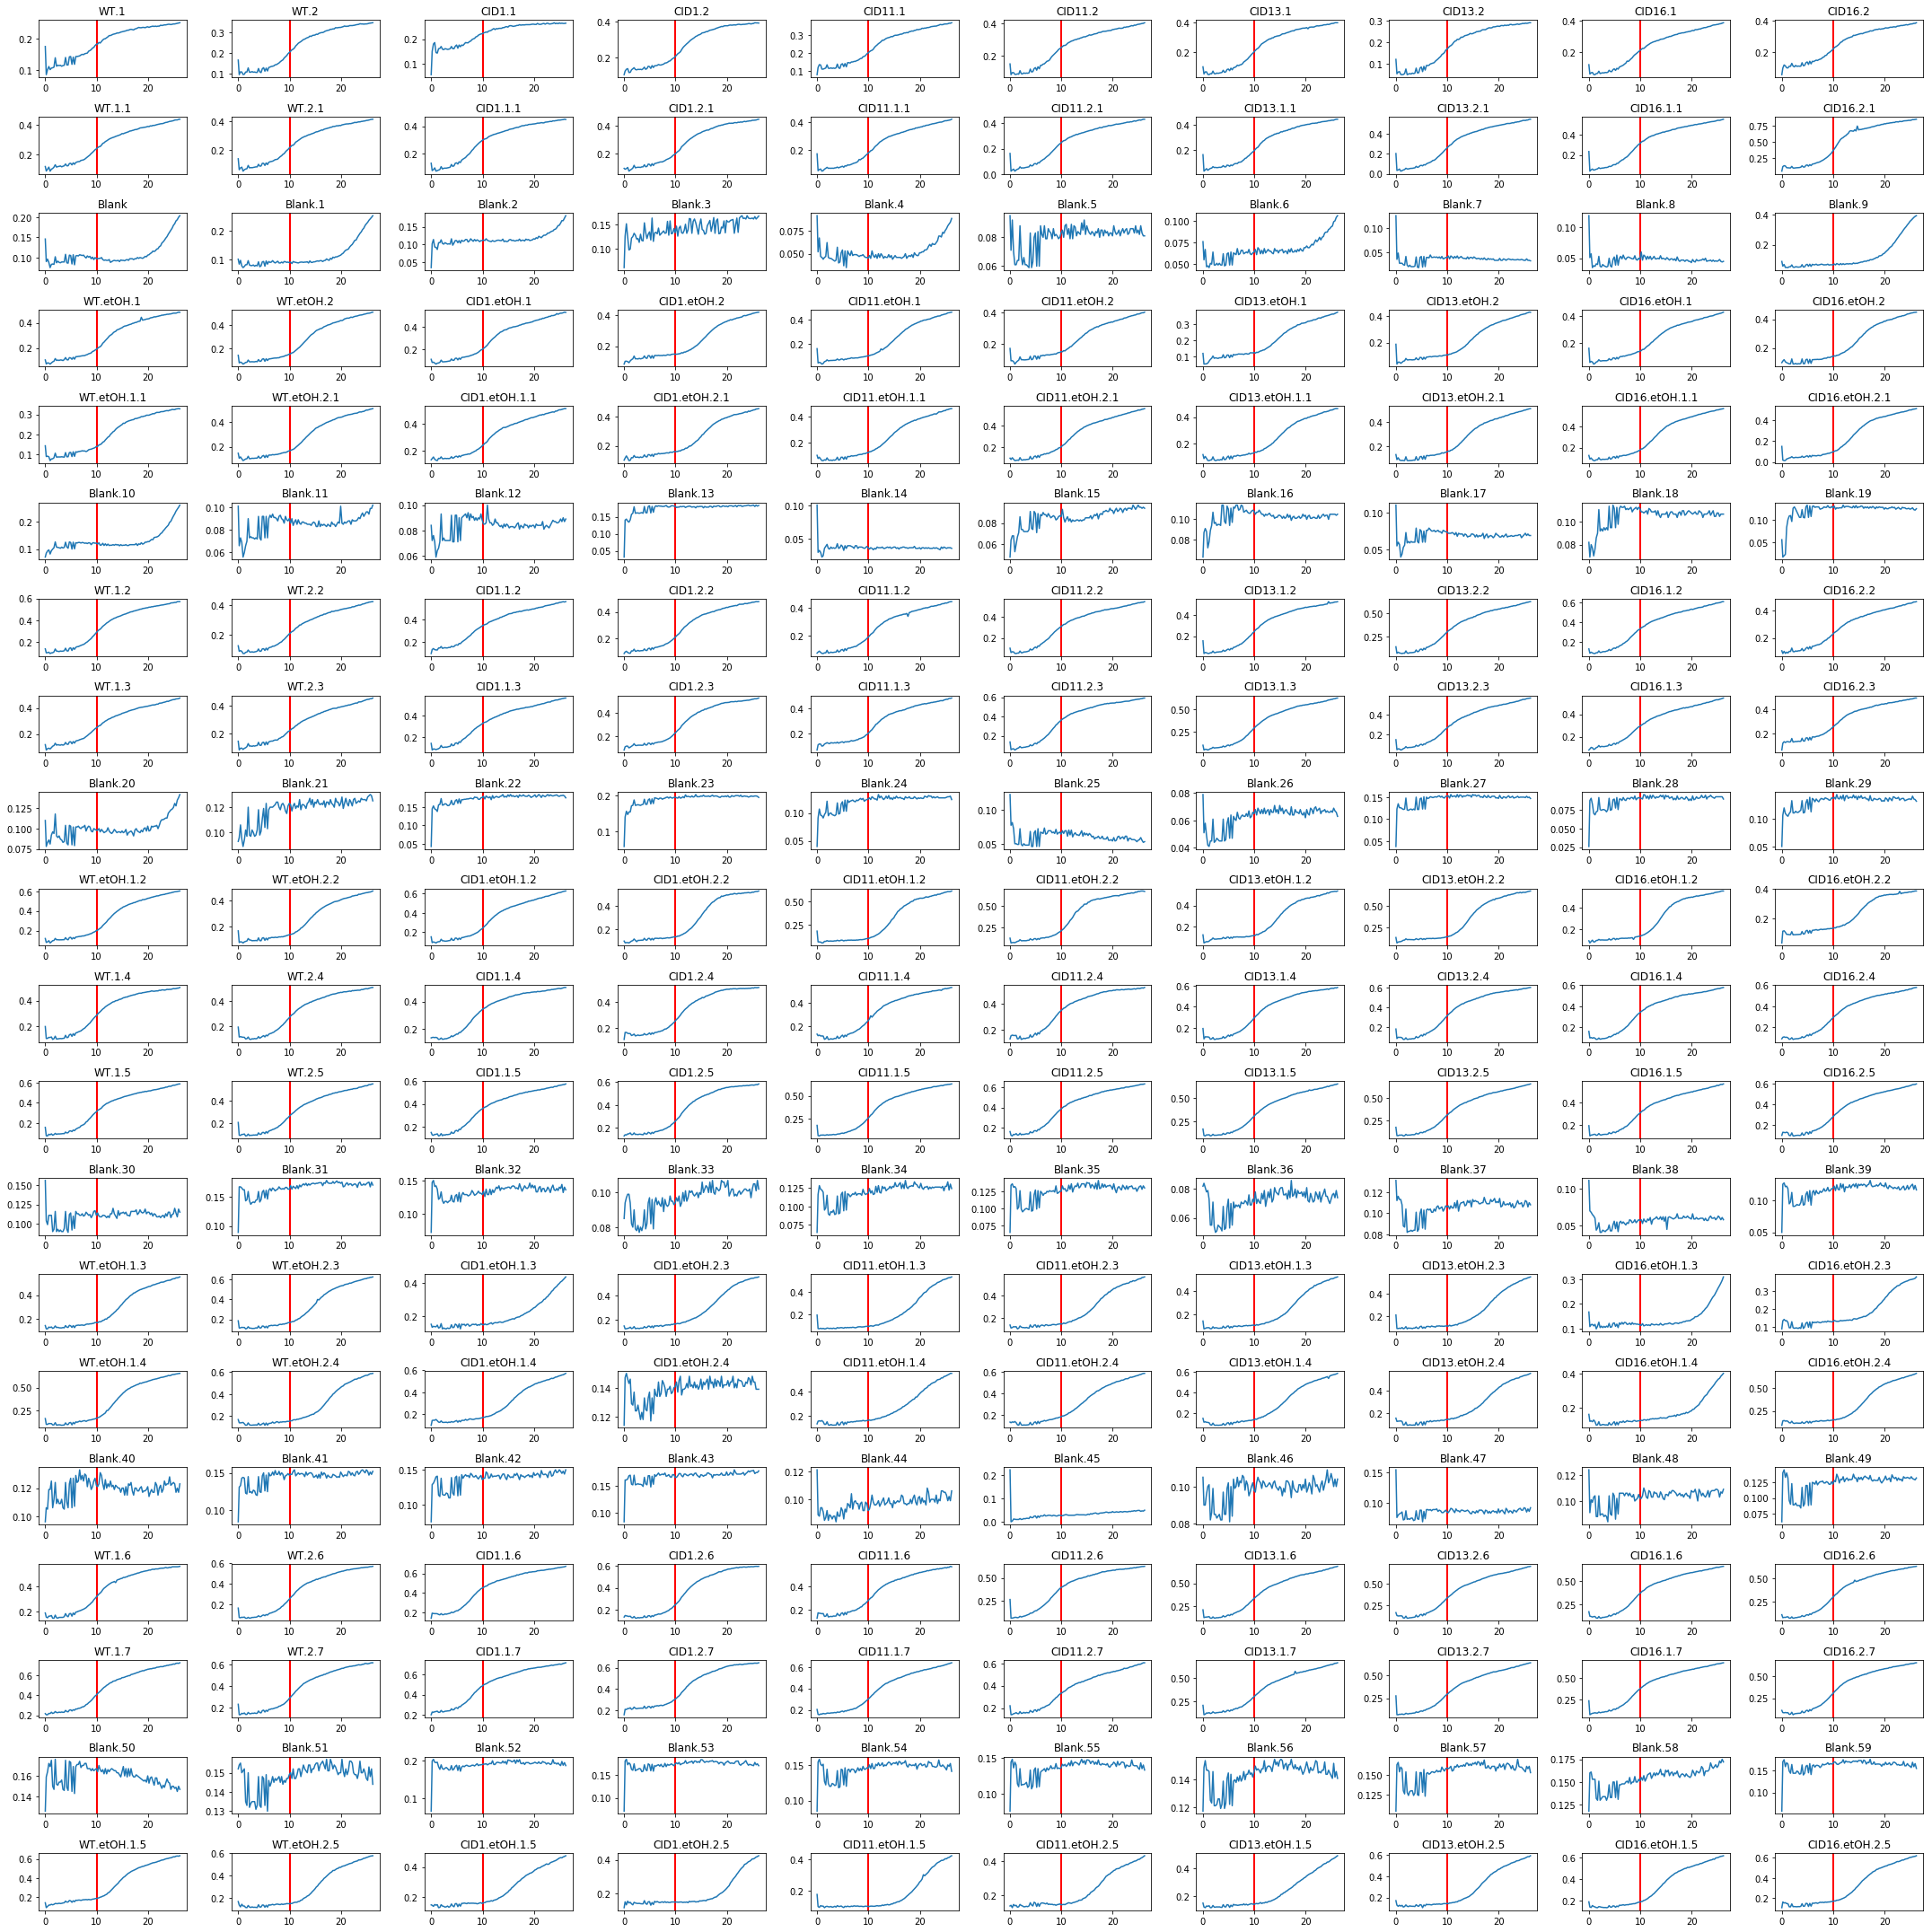

In [85]:
## Draw the matrix with raw results of growthcurves in every well on 100-well plate:

column_names= krzywe_Time.columns
time=krzywe_Time["Time"]

f = plt.figure(figsize=(30,30))

len(column_names)
for siatka_n, column_name in enumerate(column_names[1:]):
    plt.subplot(20, 10, siatka_n+1)
    plt.title(column_name)
#    plt.ylim([0,0.8])
    plt.axvline(x=10, linewidth=2, color='r')
    plt.plot(time, krzywe_Time[column_name])
    
plt.tight_layout()
f.savefig("all_figures_2.pdf")    #Save the figure as .pdf. or .png file

# Use pyphe-growthcurves module written by Stephan Kamrad from Bahler Lab (UK)

"pyphe-growthcurves
Python module, including command line interface, for on-parametric characterisation of microbial growth curves written by Stephan Kamrad (stephan.kamrad@crick.ac.uk).
Source of " Source and code: https://github.com/Bahler-Lab/pyphe-growthcurves

### Preparation of DataFrame fror Pyphe-growthcurves analysis:

In [100]:
## Take DataFrame prepared earlier, drop comumn name "Time", and export new DataFrame to .csv file:
table_for_pyphe = indexed_plus_time
table_for_pyphe.index.names = ['']
table_for_pyphe.to_csv('pyphe_table_1.csv', sep = ',') #Data in DataFrame should be separated wit ","

### Make the analysis according to the https://github.com/Bahler-Lab/pyphe-growthcurves. 

#### As a result you will obtain two files: 
1. The pdf file with growth curves with max_slope and lagphase.
2. The csv file with numerical results such as: max_slope, lag phase, initial biomass and other.

__Example Input:__

pyphe_table_1.csv

__Example Output:__
1. pyphe_table_1_curves.pdf
2. pyphe_table_1_results.csv

In [101]:
#Pyphe growthcurves
!python pyphe-growthcurves_3pkt.py --input pyphe_table_1.csv --plots

Analysis done: pyphe_table_1.csv


In [194]:
pyphe_results = pd.read_csv('pyphe_table_1_results.csv', sep = ',', index_col=0)

In [195]:
wyniki_pyphe_transposed = pyphe_results.transpose()

In [196]:
## Add column Mutant beeing a copy of the index of the DataFrame
wyniki_pyphe_transposed["Mutant"] = wyniki_pyphe_transposed.index
wyniki_pyphe_transposed.head()

,initial biomass,lag,t_max,max_slope,r2,y-intercept,x-intercept,Mutant
WT.1,0.121333,22.440556,1.690556,0.064000,0.796680,0.011138,-0.174028,WT.1
WT.2,0.122333,11.690556,4.690741,0.048032,0.898323,-0.106972,2.227099,WT.2
CID1.1,0.128333,17.190833,0.211944,0.275916,0.871304,0.069854,-0.253173,CID1.1
CID1.2,0.119667,11.190833,0.211944,0.066770,0.931209,0.105515,-1.580266,CID1.2
CID11.1,0.110000,11.190833,0.211944,0.124114,0.902344,0.083695,-0.674339,CID11.1


In [ ]:
wyniki_pyphe_transposed["Strain"] =wyniki_pyphe_transposed["Mutant"].split

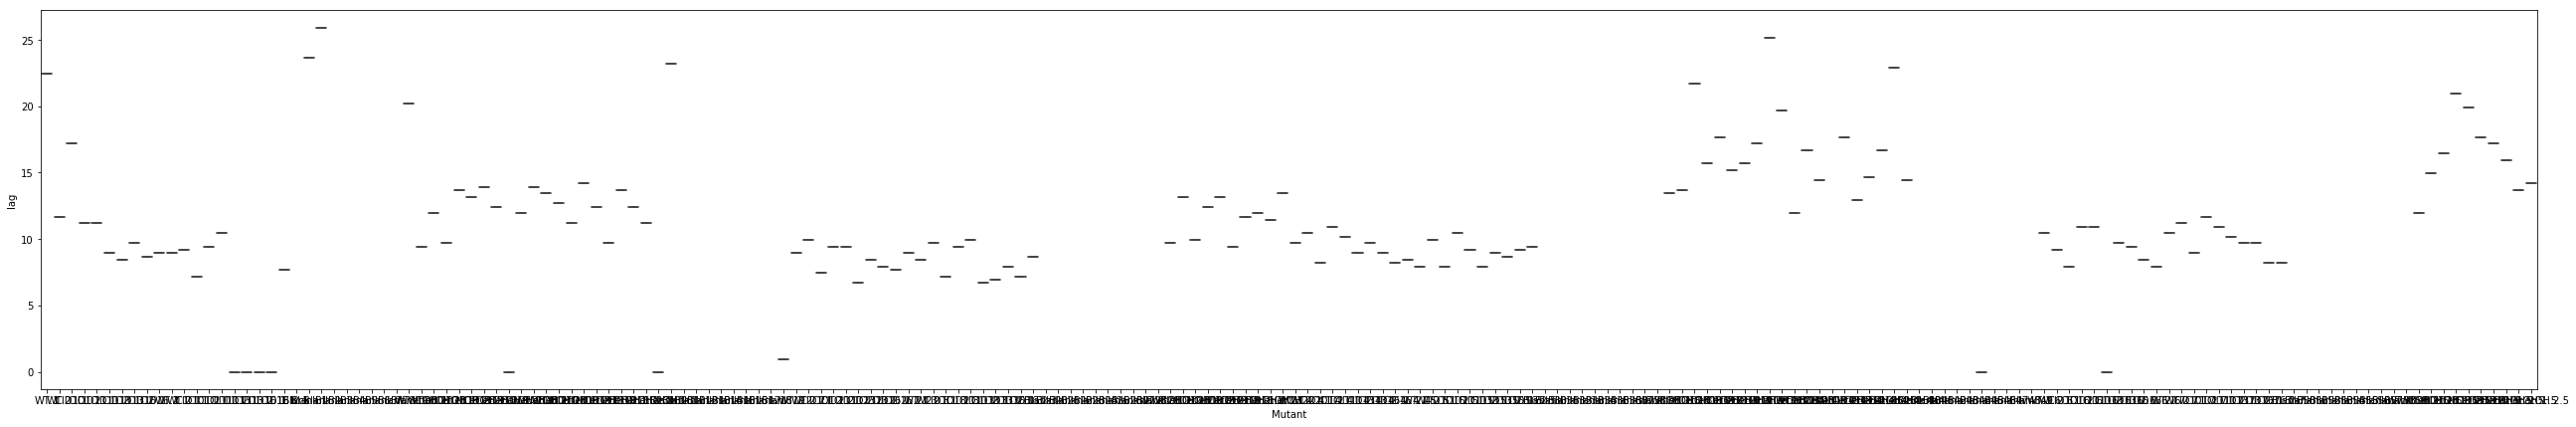

In [184]:
# lagfaza
f = plt.figure(figsize=(45,7))
sns.boxplot(x = wyniki_pyphe_transposed["Mutant"],y=wyniki_pyphe_transposed["lag"])
#f.savefig("pyphe_lag_stres_20190517.png")

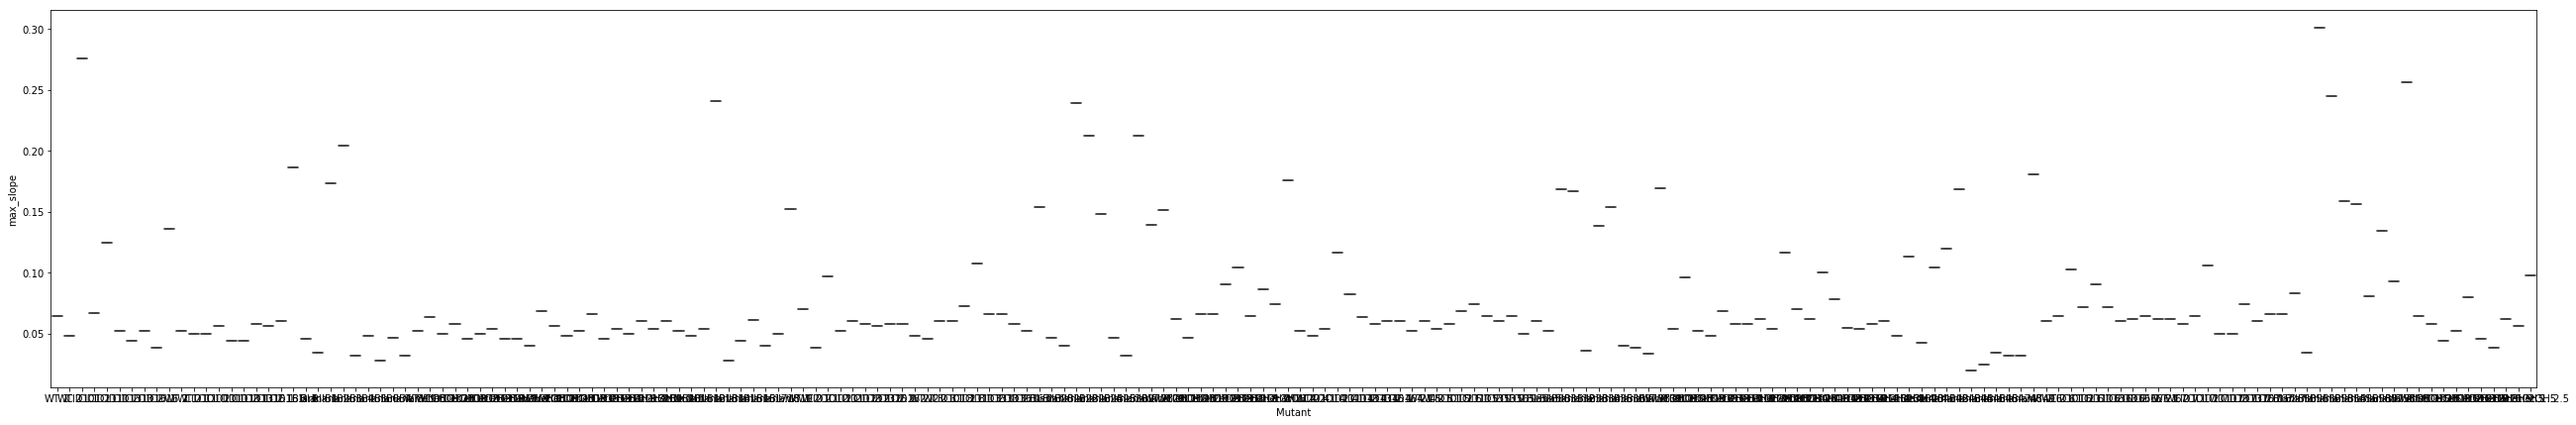

In [186]:
# max_slope
f = plt.figure(figsize=(45,7))
sns.boxplot(x = wyniki_pyphe_transposed["Mutant"],y=wyniki_pyphe_transposed["max_slope"])
#f.savefig("pyphe_max_slope_stres_20190517.png")